<a href="https://colab.research.google.com/github/robLaing2/Forex_ANN_Forecasting/blob/master/ForexAnnEnvironment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Environment

In [1]:
%tensorflow_version 2.x

!pip install quandl
!pip install dbnomics
#!pip install FRB
!pip install fred
!pip install mock
#!pip uninstall tensorflow
#!pip install tensorflow==2.0.0

import fred
from mock import Mock
import requests
import json
import quandl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from dbnomics import fetch_series
import pandas as pd
from keras.models import model_from_json
import matplotlib as mpl
import matplotlib.pyplot as plt

TensorFlow 2.x selected.
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=99449d0c0ae6abef16f412865776d638515c5d4c80119f96f5185ef9314e37f7
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
  Created wheel for fred: filename=fred-3.1-cp36-none-any.whl size=3911 sha256=209e06d69054f357cc3c350e758d470c3bb5c7fe51bd25188cd363895a422aab
  Stored in directory: /root/.cache/pip/wheels/c5/4c/87/eb32bd051f3888ff21dbcd0cbc8a5512579aba99213e7d3183
Successfully built fred


Using TensorFlow backend.


# Data Prepartion

In [0]:
START_DATE = '2001-01-01'
END_DATE = ''

In [0]:



    for x in range(len(datasetX)):
        if (datasetX[x]["value"] == '.' or datasetY[x]["value"] == '.' 
            or datasetX[x]["value"] == 0 or datasetY[x]["value"] == 0):
            continue

        dates.append(pd.Timestamp(datasetX[x]["date"]))
        valuesX.append(float(datasetX[x]["value"]))
        valuesY.append(float(datasetY[x]["value"]))

## Pre-processing Interest Rate data


In [0]:
GBPovr = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GBPONTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start=' + START_DATE)
EURovr = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=EURONTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start=' + START_DATE)
GBP1month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GBP1MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start=' + START_DATE)
EUR1month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=EUR1MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start=' + START_DATE)
GBP3month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GBP3MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)
EUR3month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=EUR3MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)
GBP6month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GBP6MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)
EUR6month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=EUR6MTD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)
GBP12month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GBP12MD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)
EUR12month = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=EUR12MD156N&api_key=cdc4dd9f1b0596f6209a77cec5453528&file_type=json&observation_start='+ START_DATE)

GBRovrJson = (json.loads(GBPovr.content))["observations"]
EURovrJson = (json.loads(EURovr.content))["observations"]
GBR1mJson = (json.loads(GBP1month.content))["observations"]
EUR1mJson = (json.loads(EUR1month.content))["observations"]
GBR3mJson = (json.loads(GBP3month.content))["observations"]
EUR3mJson = (json.loads(EUR3month.content))["observations"]
GBR6mJson = (json.loads(GBP6month.content))["observations"]
EUR6mJson = (json.loads(EUR6month.content))["observations"]
GBR12mJson = (json.loads(GBP12month.content))["observations"]
EUR12mJson = (json.loads(EUR12month.content))["observations"]

def getDiffValues(datasetX, datasetY):
    dates = []
    valuesX = []
    valuesY = []
    ratioValues = []

    xDict = {pd.Timestamp(datasetX[i]["date"]): datasetX[i]["value"] for i in range(len(datasetX))}  
    yDict = {pd.Timestamp(datasetY[i]["date"]): datasetY[i]["value"] for i in range(len(datasetY))}                        

    for k,v in xDict.items():

        match = yDict.get(k, 0)

        if (match==0 or match=='.' or v==0 or v=='.'):
            continue
        else:
            valuesX.append(float(v))
            valuesY.append(float(match))
            dates.append(k)
 
    datasetXarr = np.array(valuesX, dtype=np.float)
    datasetYarr = np.array(valuesY, dtype=np.float)

    diffValues = datasetXarr - datasetYarr

    data_mean = diffValues.mean()
    data_std = diffValues.std()
    dataNormalised = (diffValues - data_mean) - data_std

    res = {dates[i]: dataNormalised[i] for i in range(len(dates))}

    return res

GBPEURovrRatio = getDiffValues(GBRovrJson,EURovrJson)
GBPEUR1mRatio = getDiffValues(GBR1mJson,EUR1mJson)
GBPEUR3mRatio = getDiffValues(GBR3mJson,EUR3mJson)
GBPEUR6mRatio = getDiffValues(GBR6mJson,EUR6mJson)
GBPEUR12mRatio = getDiffValues(GBR12mJson,EUR12mJson)

## Pre-processing Inflation data

In [115]:
ukCPI = fetch_series('IMF/CPI/M.GB.PCPIHA_PC_CP_A_PT')
euCPI = fetch_series('IMF/CPI/M.U2.PCPIHA_PC_CP_A_PT')

dbnomicsQuery = "period >= '" + START_DATE + "'"

ukCPI = ukCPI.query(dbnomicsQuery)
euCPI = euCPI.query(dbnomicsQuery)

ukDict = {ukCPI.period.iloc[i]: ukCPI.value.iloc[i] for i in range(len(ukCPI))}
euDict = {euCPI.period.iloc[i]: euCPI.value.iloc[i] for i in range(len(euCPI))}

dates = []
ukCPIarr = []
euCPIarr = []

for k,v in ukDict.items():

    match = euDict.get(k, 0)

    if (match != 0):
        ukCPIarr.append(v)
        euCPIarr.append(match)
        dates.append(k)


ukCPIarr = np.array(ukCPIarr, dtype=np.float)
euCPIarr = np.array(euCPIarr, dtype=np.float)

ukEuCpiRatio = ukCPIarr - euCPIarr

# Normalise CPI data
cpi_mean = ukEuCpiRatio.mean()
cpi_std = ukEuCpiRatio.std()

ukEuCpiRatio = (ukEuCpiRatio - cpi_mean) / cpi_std


cpiDict = {dates[i]: ukEuCpiRatio[i] for i in range(len(dates))}

cpiData = {'Date':dates, 'Value':ukEuCpiRatio}
cpiDf = pd.DataFrame(cpiData)

print(cpiDf)

          Date     Value
0   2001-01-01 -1.442093
1   2001-02-01 -1.707945
2   2001-03-01 -1.663621
3   2001-04-01 -2.049658
4   2001-05-01 -1.866541
..         ...       ...
224 2019-09-01  0.563440
225 2019-10-01  0.384786
226 2019-11-01  0.046907
227 2019-12-01 -0.421234
228 2020-01-01  0.033200

[229 rows x 2 columns]


## Pre-processing International Reserves data

In [0]:
ukIRdates = []
for x in ukIR.period:
    ukIRdates.append(x)

In [125]:
ukIR = fetch_series('IMF/IFS/M.GB.RAFAGOLDM_USD')
euIR = fetch_series('IMF/IFS/M.U2.RAFAGOLDM_USD')

dbnomicsQuery = "period >= '" + START_DATE + "'"

ukIR = ukIR.query(dbnomicsQuery)
euIR = euIR.query(dbnomicsQuery)

ukIRDict = {ukIR.period.iloc[i]: ukIR.value.iloc[i] for i in range(len(ukIR))}
euIRDict = {euIR.period.iloc[i]: euIR.value.iloc[i] for i in range(len(euIR))}

IRdates = []
ukIRarr = []
euIRarr = []

for k,v in ukIRDict.items():

    match = euIRDict.get(k, 0)

    if (match != 0):
        ukIRarr.append(v)
        euIRarr.append(match)
        IRdates.append(k)


ukIRarr = np.array(ukIRarr, dtype=np.float)
euIRarr = np.array(euIRarr, dtype=np.float)

ukEuIRRatio = ukIRarr / euIRarr

ir_mean = ukEuIRRatio.mean()
ir_std = ukEuIRRatio.std()
ukEuIRRatio = (ukEuIRRatio - ir_mean) / ir_std

irDict = {ukIRdates[i]: ukEuIRRatio[i] for i in range(len(ukIRdates))}

irData = {'Date':ukIRdates, 'Value':ukEuIRRatio}
irDf = pd.DataFrame(irData)

print(irDf)

          Date     Value
0   2001-01-01  4.961552
1   2001-02-01  4.962538
2   2001-03-01  3.861074
3   2001-04-01  3.817895
4   2001-05-01  2.895680
..         ...       ...
224 2019-09-01  0.376054
225 2019-10-01  0.376293
226 2019-11-01  0.376484
227 2019-12-01  0.376341
228 2020-01-01  0.376245

[229 rows x 2 columns]


## Pre-processing Balance of Payments data

In [128]:
ukBOP = fetch_series('IMF/BOP/Q.GB.BACK_BP6_USD')
euBOP = fetch_series('IMF/BOP/Q.U2.BACK_BP6_USD')

dbnomicsQuery = "period >= '" + START_DATE + "'"

ukBOP = ukBOP.query(dbnomicsQuery)
euBOP = euBOP.query(dbnomicsQuery)

ukBOPDict = {ukBOP.period.iloc[i]: ukBOP.value.iloc[i] for i in range(len(ukBOP))}
euBOPDict = {euBOP.period.iloc[i]: euBOP.value.iloc[i] for i in range(len(euBOP))}

BOPdates = []
ukBOParr = []
euBOParr = []

for k,v in ukBOPDict.items():

    match = euBOPDict.get(k, 0)

    if (match != 0):
        ukBOParr.append(v)
        euBOParr.append(match)
        BOPdates.append(k)

ukBOParr = np.array(ukBOParr, dtype=np.float)
euBOParr = np.array(euBOParr, dtype=np.float)

ukEuBOPRatio = ukBOParr*1000 / euBOParr*1000

# Normalise BOP data
bop_mean = ukEuBOPRatio.mean()
bop_std = ukEuBOPRatio.std()
ukEuBOPRatio = (ukEuBOPRatio - bop_mean) / bop_std

bopDict = {BOPdates[i]: ukEuBOPRatio[i] for i in range(len(BOPdates))}

bopData = {'Date':BOPdates, 'Value':ukEuBOPRatio}
bopDf = pd.DataFrame(bopData)

print(bopDf)

         Date     Value
0  2001-01-01  0.291969
1  2001-04-01  0.367693
2  2001-07-01 -0.627331
3  2001-10-01 -0.109854
4  2002-01-01  0.074486
..        ...       ...
70 2018-07-01  0.113390
71 2018-10-01  0.088375
72 2019-01-01  0.010365
73 2019-04-01 -0.049091
74 2019-07-01  0.139038

[75 rows x 2 columns]


## Pre-processing FOREX data


In [129]:
# Get FOREX data
quandl.ApiConfig.api_key = "VXqfuyrbTE8xxYZzqePw"
dataGbpEurRate = quandl.get("BOE/XUDLERS", start_date=START_DATE, returns="numpy")
forexDataN = dataGbpEurRate.Value

# Normalise data
forex_mean = forexDataN.mean()
forex_std = forexDataN.std()
forexDataN = (forexDataN - forex_mean) / forex_std

forexData = {'Date':dataGbpEurRate.Date,'Value':forexDataN}
forexDf = pd.DataFrame(forexData)

print (forexDf)

           Date     Value
0    2001-01-02  1.644247
1    2001-01-03  1.720163
2    2001-01-04  1.655786
3    2001-01-05  1.597482
4    2001-01-08  1.638173
...         ...       ...
4846 2020-03-02 -0.987919
4847 2020-03-03 -0.981239
4848 2020-03-04 -0.953301
4849 2020-03-05 -0.929616
4850 2020-03-06 -0.947836

[4851 rows x 2 columns]


## FOREX Moving Averages

In [0]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

ukFOREXdates = []
for x in dataGbpEurRate.Date:
    ukFOREXdates.append(pd.Timestamp(x))

def getMovingAverages(data, windowSize):

    movingAverages = []

    for x in range(len(data)):
        if (x < windowSize):
            window = data[:x+1]
        else:
            window = data[x-(windowSize - 1):x+1]
        
        total = sum(window)
        average = total / len(window)
        movingAverages.append(average)

    return movingAverages

fiveDayMovingAverages = getMovingAverages(forexDataN, 5)
tenDayMovingAverages = getMovingAverages(forexDataN, 10)

fiveDayDict = {ukFOREXdates[i]: fiveDayMovingAverages[i] for i in range(len(fiveDayMovingAverages))}
tenDayDict = {ukFOREXdates[i]: tenDayMovingAverages[i] for i in range(len(tenDayMovingAverages))}

## Creating full data matrix

In [134]:
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

mainDf = pd.DataFrame(columns=['Date','ForexRate','5dayMovingAvg','10dayMovingAvg','CPIRatio', 'IRRatio', 'BOPRatio', 'OvrLIBOR', '1mLIBOR','3mLIBOR','6mLIBOR','12mLIBOR'])

cpiCounter = 0
irCounter = 0

for index, row in forexDf.iterrows():

    newD = row['Date']
    roundD = newD.replace(day=1)
    quarterD = 1

    quarter = newD.quarter

    cpi = cpiDict.get(roundD,0)
    ir = irDict.get(roundD,0)

    switcher={
        1:newD.replace(month=1,day=1),
        2:newD.replace(month=4,day=1),
        3:newD.replace(month=7,day=1),
        4:newD.replace(month=10,day=1)
    }

    quarterD = switcher.get(newD.quarter)

    bop = bopDict.get(quarterD,0)

    ovrI = GBPEURovrRatio.get(row['Date'], 0)
    i1month = GBPEUR1mRatio.get(row['Date'], 0)
    i3month = GBPEUR3mRatio.get(row['Date'], 0)
    i6month = GBPEUR6mRatio.get(row['Date'], 0)
    i12month = GBPEUR12mRatio.get(row['Date'], 0)

    movingAvg5Day = fiveDayDict.get(row['Date'], 0)
    movingAvg10Day = tenDayDict.get(row['Date'], 0)

    mainDf = mainDf.append({'Date':row['Date'],
                            'ForexRate':row['Value'],
                            '5dayMovingAvg':movingAvg5Day,
                            '10dayMovingAvg':movingAvg10Day,
                            'CPIRatio': cpi,
                            'IRRatio' : ir,
                            'BOPRatio': bop,
                            'OvrLIBOR': ovrI,
                            '1mLIBOR': i1month,
                            '3mLIBOR': i3month,
                            '6mLIBOR': i6month,
                            '12mLIBOR': i12month},
                            ignore_index=True)


#mainDf.set_index('Date')

print(mainDf)

# Split and format data
futureDistance = 0
historySize = 6

           Date  ForexRate  5dayMovingAvg  10dayMovingAvg  CPIRatio   IRRatio  \
0    2001-01-02  1.644247   1.644247       1.644247       -1.442093  4.961552   
1    2001-01-03  1.720163   1.682205       1.682205       -1.442093  4.961552   
2    2001-01-04  1.655786   1.673399       1.673399       -1.442093  4.961552   
3    2001-01-05  1.597482   1.654420       1.654420       -1.442093  4.961552   
4    2001-01-08  1.638173   1.651170       1.651170       -1.442093  4.961552   
...         ...       ...        ...            ...             ...       ...   
4846 2020-03-02 -0.987919  -0.817746      -0.748085        0.000000  0.000000   
4847 2020-03-03 -0.981239  -0.880179      -0.783371        0.000000  0.000000   
4848 2020-03-04 -0.953301  -0.925972      -0.813130        0.000000  0.000000   
4849 2020-03-05 -0.929616  -0.946621      -0.835844        0.000000  0.000000   
4850 2020-03-06 -0.947836  -0.959982      -0.861473        0.000000  0.000000   

      BOPRatio  OvrLIBOR   

# Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = mainDf.iloc[:,0:20]  #independent columns
y = mainDf['FOREXRate']    #target column i.e price range

features = ['ForexRate', 'CPIRatio', 'OvrLIBOR']

dataSet = mainDf[features]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

KeyError: ignored

# Models

## Standard ANN

In [11]:
from joblib import dump, load
import pickle



def formatData(data, start, end, history, target):
    x = []
    y = []
    
    startIndex = start + historySize
    endIndex = len(data) - futureDistance

    for i in range(startIndex, endIndex):
        indices = range(i-historySize, i)
        # Reshape data from (history_size,) to (history_size, 1)
        x.append(data[indices])
        y.append(data[i+futureDistance])
        
    return np.array(x), np.array(y)


TRAIN_SPLIT = round(len(forexDataN) * 0.7)
VALIDATION_SPLIT = round(len(forexDataN) * 0.85)

xTrain, yTrain = formatData(forexDataN, 0, TRAIN_SPLIT, historySize, futureDistance)
xVal, yVal = formatData(forexDataN, TRAIN_SPLIT, VALIDATION_SPLIT, historySize, futureDistance)
xTest, yTest = formatData(forexDataN, VALIDATION_SPLIT, None, historySize, futureDistance)

print(xTest[0])
print(yTest[0])

BATCH_SIZE = 30
BUFFER_SIZE = 10

# Form training tensors and shuffle etc.
dataTrain = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
dataTrain = dataTrain.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# Form validation tensors and shuffle etc.
dataVal = tf.data.Dataset.from_tensor_slices((xVal, yVal))
dataVal = dataVal.batch(BATCH_SIZE).repeat()

# Create model
EVALUATION_INTERVAL = 10
EPOCHS = 2

def standard_ann_model():
	model = keras.Sequential([
        layers.Dense(6,input_dim=(6),kernel_initializer='normal',activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])

	model.compile(optimizer='adam', loss='mse')
	return model


model = standard_ann_model()

model.fit(dataTrain, epochs=EPOCHS,
                    steps_per_epoch=EVALUATION_INTERVAL,
                    validation_data=dataVal,
                    validation_steps=50
          )


model.save('newmodel.h5')

result = model.evaluate(xTest, yTest, batch_size=30)
print("-----------------------------------------")
print("Model loss:", result)


#print(type(model))

[-0.76215916 -0.88166344 -1.15671295 -1.30656751 -1.13584713 -1.15481606]
-1.2932892624809638
Train for 10 steps, validate for 50 steps
Epoch 1/2
10/10 [==============================] - 1s 73ms/step - loss: 1.8767 - val_loss: 0.3732
Epoch 2/2
153/153 [==============================] - 0s 453us/sample - loss: 0.3686
-----------------------------------------
Model loss: 0.3686016896630035


## Univariate LSTM

In [12]:
def formatData(data, start, end, history, target):
    x = []
    y = []
    
    startIndex = start + historySize
    endIndex = len(data) - futureDistance

    for i in range(startIndex, endIndex):
        indices = range(i-historySize, i)
        # Reshape data from (history_size,) to (history_size, 1)
        x.append(np.reshape(data[indices], (historySize, 1)))
        y.append(data[i+futureDistance])
        
    return np.array(x), np.array(y)

TRAIN_SPLIT = round(len(forexDataN) * 0.7)
VALIDATION_SPLIT = round(len(forexDataN) * 0.85)

xTrain, yTrain = formatData(forexDataN, 0, TRAIN_SPLIT, historySize, futureDistance)
xVal, yVal = formatData(forexDataN, TRAIN_SPLIT, VALIDATION_SPLIT, historySize, futureDistance)
xTest, yTest = formatData(forexDataN, VALIDATION_SPLIT, None, historySize, futureDistance)

BATCH_SIZE = 30
BUFFER_SIZE = 10

# Form training tensors and shuffle etc.
dataTrain = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
dataTrain = dataTrain.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# Form validation tensors and shuffle etc.
dataVal = tf.data.Dataset.from_tensor_slices((xVal, yVal))
dataVal = dataVal.batch(BATCH_SIZE).repeat()

# Create model
EVALUATION_INTERVAL = 100
EPOCHS = 10

def lstm_ann_model_single():
    lstm_model = keras.Sequential([
        layers.LSTM(8, input_shape=xTrain.shape[-2:]),
        layers.Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')
    return lstm_model

modelS = lstm_ann_model_single()

modelS.fit(dataTrain, epochs=EPOCHS,
                     steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=dataVal,
                      validation_steps=50)



result = modelS.evaluate(xTest, yTest, batch_size=30)
print("-----------------------------------------")
print("Model loss:", result)



Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 2s 20ms/step - loss: 0.8946 - val_loss: 0.1690
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 0.5452 - val_loss: 0.0649
Epoch 3/10
100/100 [==============================] - 0s 5ms/step - loss: 0.3366 - val_loss: 0.0605
Epoch 4/10
100/100 [==============================] - 1s 5ms/step - loss: 0.2224 - val_loss: 0.0646
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 0.1237 - val_loss: 0.0645
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 0.1182 - val_loss: 0.0626
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 0.0884 - val_loss: 0.0594
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 0.0681 - val_loss: 0.0555
Epoch 9/10
100/100 [==============================] - 1s 5ms/step - loss: 0.0542 - val_loss: 0.0511
Epoch 10/10
153/153 [==============================] - 0

## Multivariate LSTM (Single-step)

In [35]:
EPOCHS = 2
EVALUATION_INTERVAL = 10

features = ['ForexRate', 'CPIRatio', 'OvrLIBOR']

dataSet = mainDf[features]
dataSet.index = mainDf['Date']

dataSet = dataSet.values

TRAIN_SPLIT = round(len(dataSet) * 0.7)
VALIDATION_SPLIT = round(len(dataSet) * 0.85)

features = []
labels = []

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

lags = 259
predictionHorizon = 60
step = 1

xTrain, yTrain = multivariate_data(dataSet, dataSet[:, 0], 0, TRAIN_SPLIT, lags, predictionHorizon, step, True)
xVal, yVal = multivariate_data(dataSet, dataSet[:, 0],TRAIN_SPLIT, None, lags, predictionHorizon, step, True)

xTest, yTest = multivariate_data(dataSet, dataSet[:, 0],VALIDATION_SPLIT, None, lags, predictionHorizon, step,True)

trainData = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
trainData = trainData.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

valData = tf.data.Dataset.from_tensor_slices((xVal, yVal))
valData = valData.batch(BATCH_SIZE).repeat()


print(len(xVal))


def lstm_ann_single_model():
    lstm_model = keras.Sequential([
        layers.LSTM(32, input_shape=xTrain.shape[-2:]),
        layers.Dense(1)
    ])

    lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')
    return lstm_model


model = lstm_ann_single_model()

single_step_history = model.fit(trainData, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=valData,
                                            validation_steps=50)



#result = model.evaluate(xTest, yTest, batch_size=30)
#print("-----------------------------------------")
#print("Model loss:", result)

0


ValueError: ignored

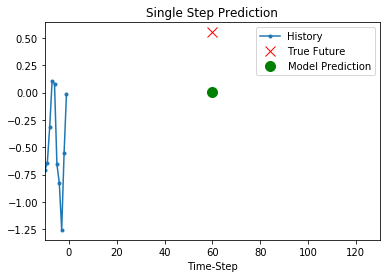

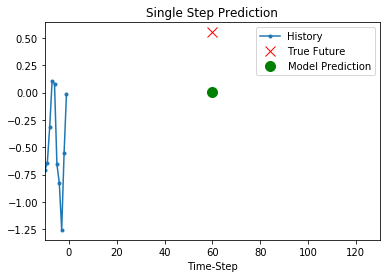

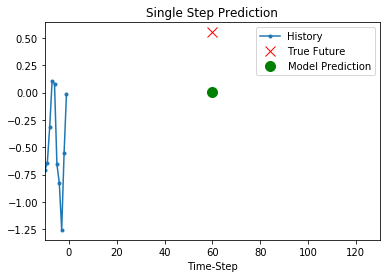

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def create_time_steps(length,steps):
  return list(np.arange(-length, 0,step=steps))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0],1)
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


for x, y in valData.take(3):
  plot = show_plot([x[0][:, 0].numpy(), y[0].numpy(),
                    model.predict(x)[0]], predictionHorizon,
                   'Single Step Prediction')
  plot.show()

##Multivariate LSTM (Multi-step)

In [15]:
future_target = 150
future_step = 30
lags = 50
step = 2
EPOCHS = 5
EVALUATION_INTERVAL = 100

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])


    if single_step:
        labels.append(target[i+target_size])
    else:
        indiciesL = range(i,i+target_size,future_step)

        labels.append(target[indiciesL])

  return np.array(data), np.array(labels)


xTrainM, yTrainM = multivariate_data(dataSet, dataSet[:, 0], 0, TRAIN_SPLIT, lags, future_target, step)
xValM, yValM = multivariate_data(dataSet, dataSet[:, 0], TRAIN_SPLIT, None, lags, future_target, step)

trainDataM = tf.data.Dataset.from_tensor_slices((xTrainM, yTrainM))
trainDataM = trainDataM.cache().batch(BATCH_SIZE).repeat()
valDataM = tf.data.Dataset.from_tensor_slices((xValM, yValM))
valDataM = valDataM.batch(BATCH_SIZE).repeat()


def lstm_ann_multi_model():
    lstm_model = keras.Sequential([
        layers.LSTM(units=32,return_sequences=True,input_shape = (xTrainM.shape[1], xTrainM.shape[2])),
        layers.LSTM(16, activation='relu'),
        layers.Dense(future_target/future_step)
    ])

    lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
    return lstm_model

model_multi = lstm_ann_multi_model()
multi_history = model_multi.fit(trainDataM, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=valDataM,validation_steps=50)

#model_multi.predict(x)[0]

Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 [==============================] - 5s 51ms/step - loss: 0.4337 - val_loss: 0.5477
Epoch 2/5
100/100 [==============================] - 2s 24ms/step - loss: 0.3666 - val_loss: 0.5481
Epoch 3/5
100/100 [==============================] - 2s 23ms/step - loss: 0.3444 - val_loss: 0.5516
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.3171 - val_loss: 0.5659
Epoch 5/5
100/100 [==============================] - 2s 23ms/step - loss: 0.3038 - val_loss: 0.5661


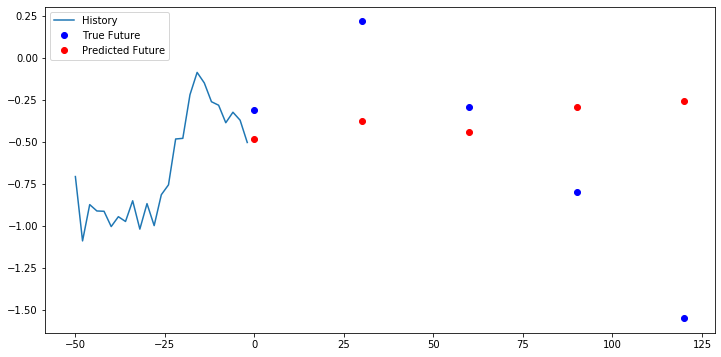

In [16]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(lags,step)
  num_out = len(true_future) * future_step

  plt.plot(num_in, np.array(history[:, 0]), label='History')
  plt.plot(np.arange(num_out, step=future_step), np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out,step=future_step), np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()


for x, y in valDataM.take(1):
  multi_step_plot(x[0], y[0], model_multi.predict(x)[0])

# Testing

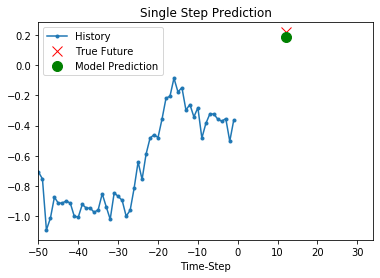

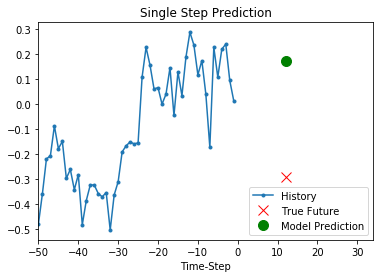

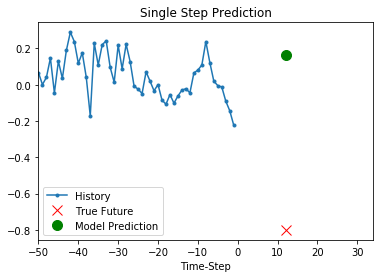

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

def multi_step_plot(history, true_future, prediction):
    print("1")
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
               label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

for x, y in valData.take(3):
  plot = show_plot([x[0][:, 0].numpy(), y[0].numpy(),
                    model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

#for x, y in valDataM.take(3):
#    multi_step_plot(x[0], y[0], model.predict(x)[0])

#for x, y in valDataM.take(3):

#    print(y)


 #   multi_step_plot(x[0], y[0], model_multi.predict(x)[0])